### Change Directory
This cell changes the working directory to the parent directory, preparing for imports from the local file structure.

In [2]:
cd ../..

D:\


### Import Libraries and Models
- Imports necessary libraries
- Imports the `ReluSegmentNetwork` and `FixedWidthReluNetwork` models from the `model.piecewise_linear_fn` modules
- Includes utility functions from the `utils.maths` modules

In [3]:
import torch
import matplotlib.pyplot as plt
from model.piecewise_linear_fn import ReluSegmentNetwork, FixedWidthReluNetwork
from utils.maths import *

## Fixed-Depth Relu Network

### Define and Plot Data Points
- Defines `x_points` and `y_points`, which represent the breakpoints and values of a piecewise linear function.
- Visualizes these data points using a scatter plot.

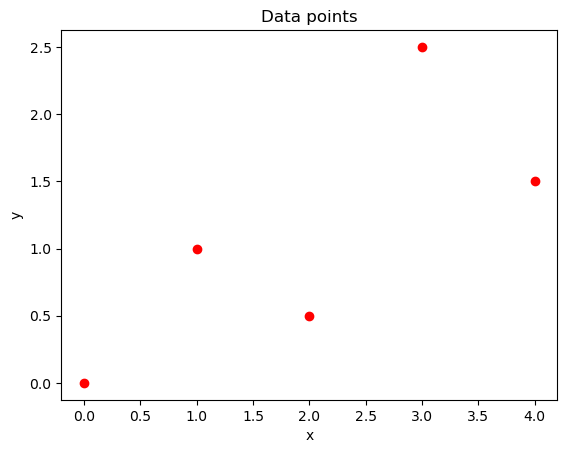

In [4]:
x_points = [0, 1, 2, 3, 4]
y_points = [0, 1, 0.5, 2.5, 1.5]

# plot
plt.plot(x_points, y_points, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.show()

### Initialize `ReluSegmentNetwork`
- Instantiates the `ReluSegmentNetwork` model using the defined `x_points` and `y_points`.

In [5]:
model = ReluSegmentNetwork(
    x_points=x_points,
    y_points=y_points
)

### Generate Function Values for `ReluSegmentNetwork`
- Defines a range of `x` values for evaluating the model.

- Uses the model to compute:
  - Base value $f_n^*(x_1)$,
  - Outputs of individual segments ($O_i$).

- Calculates the reconstructed piecewise linear function ($f_x$) by summing these components.
- Computes the original piecewise linear function using a mask for comparison.

In [6]:
x = torch.linspace(-1, 10, 500)

with torch.no_grad():
    base_value, segment_outputs = model(x)

f_x = base_value + sum(segment_outputs)

original_f_x = torch.zeros_like(x)
for i in range(len(x_points) - 1):
    mask = (x >= x_points[i]) & (x < x_points[i + 1])
    original_f_x[mask] = (
        y_points[i]
        + (x[mask] - x_points[i])
        * (y_points[i + 1] - y_points[i])
        / (x_points[i + 1] - x_points[i])
    )
original_f_x[x >= x_points[-1]] = y_points[-1]  # Handle the last point

### Plot Results for `ReluSegmentNetwork`
- Creates two subplots:
  - Original piecewise linear function, connecting `x_points` and `y_points`.
  - Reconstructed function generated by `ReluSegmentNetwork`.
- Configures axes, legends, and grid for clarity.

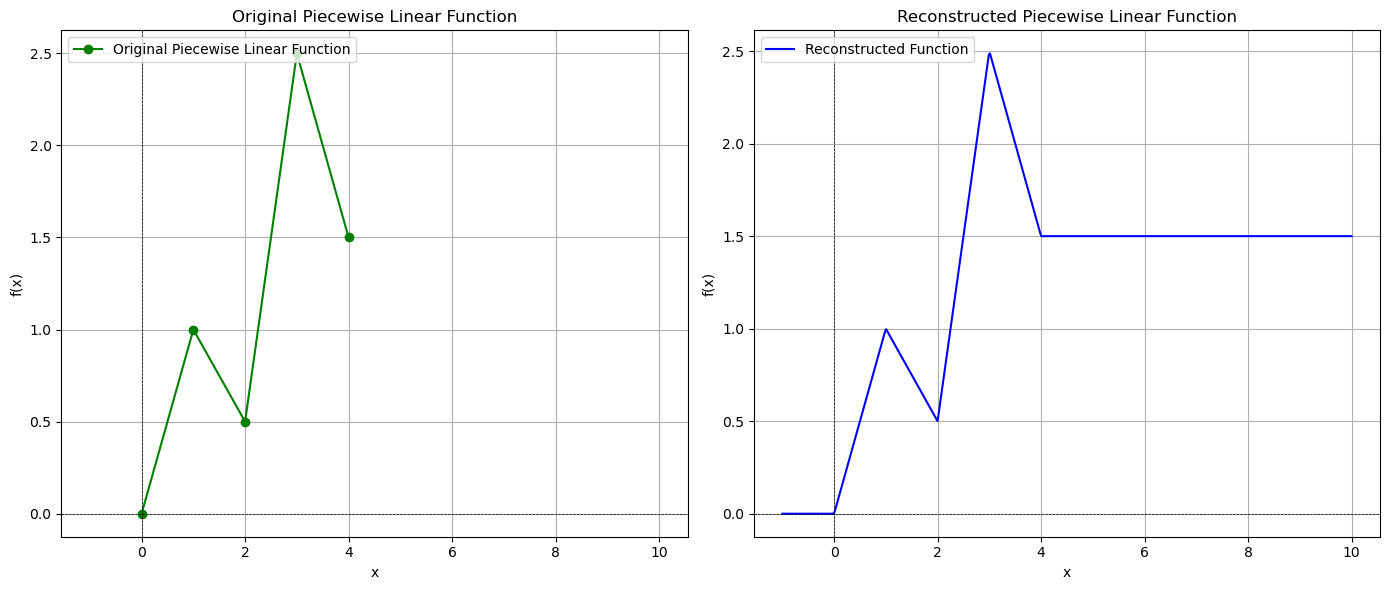

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot the original piecewise linear function by connecting the given x,y coordinates
axs[0].plot(x_points, y_points, label="Original Piecewise Linear Function", color="green", marker="o")
axs[0].set_title("Original Piecewise Linear Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].legend(loc="upper left")
axs[0].grid()

# Plot the reconstructed piecewise linear function
axs[1].plot(x.numpy(), f_x.numpy(), label="Reconstructed Function", color="blue")
axs[1].set_title("Reconstructed Piecewise Linear Function")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].legend(loc="upper left")
axs[1].grid()

plt.tight_layout()
plt.show()

The reconstructed function closely matches the original piecewise linear function, demonstrating the model's ability to approximate the function. The plot in given interval matches perfectly with the original function, while the plot outside the interval has $f(x)$ staying constant at the last value of the interval.

## Fixed-Width Relu Network

### Define and Plot New Data Points
- Redefines `x_points` and `y_points` to represent a different piecewise linear function.
- Visualizes the new data points.

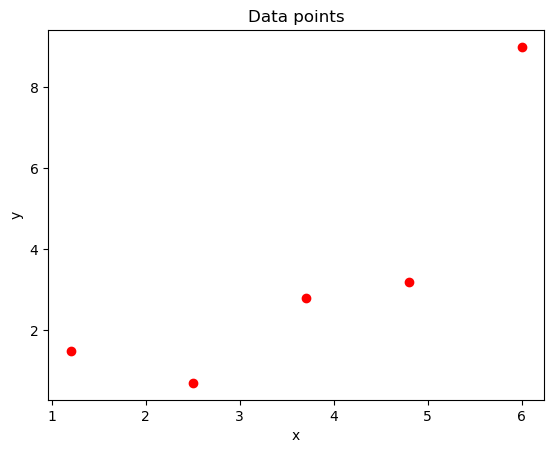

In [8]:
x_points = [1.2, 2.5, 3.7, 4.8, 6.0]
y_points = [1.5, 0.7, 2.8, 3.2, 9.0]

# plot
plt.plot(x_points, y_points, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.show()

### Initialize `FixedWidthReluNetwork`
- Instantiates the `FixedWidthReluNetwork` model using the new `x_points` and `y_points`.

In [9]:
fixed_model = FixedWidthReluNetwork(
    x_points=x_points,
    y_points=y_points
)

### Generate and Plot Results for `FixedWidthReluNetwork`
- Evaluates the model over the range of $x$ values.
- Creates two subplots:
  - Original piecewise linear function, connecting the new $x_points$ and $y_points$.
  - Reconstructed function generated by `FixedWidthReluNetwork`.
- Ensures shared axes for direct comparison.

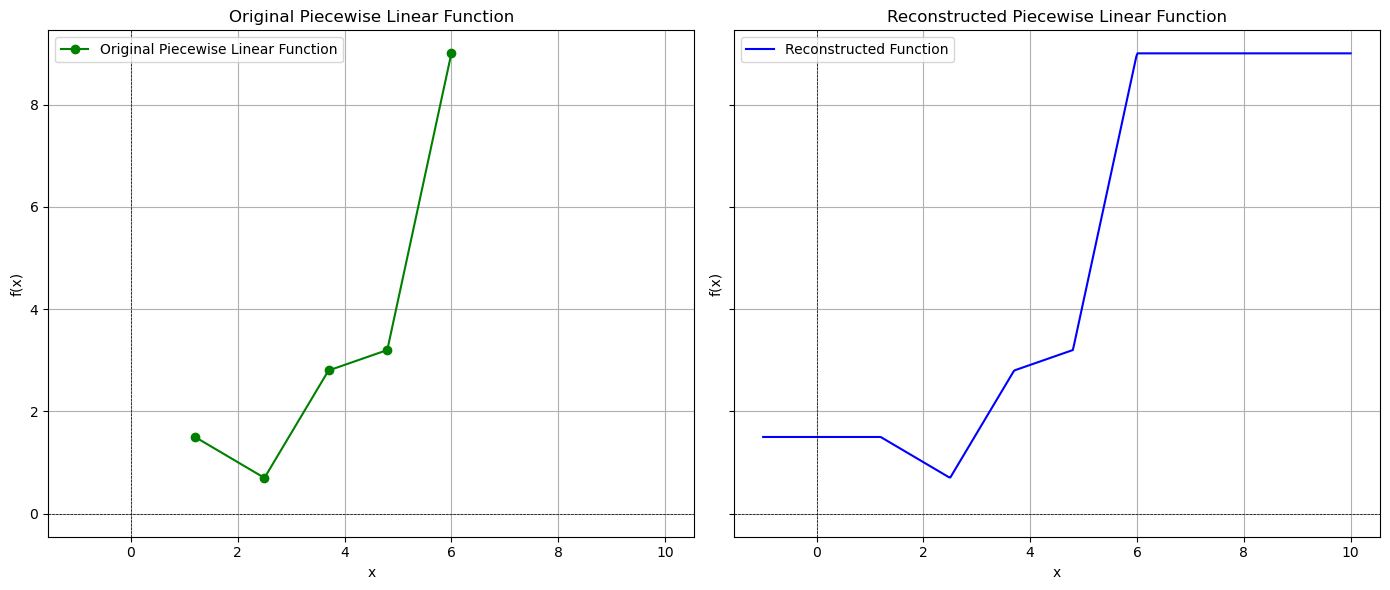

In [10]:
x = torch.linspace(-1, 10, 500)

# Compute the function output
with torch.no_grad():
    f_x = fixed_model(x)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot the original piecewise linear function by connecting the given x, y coordinates
axs[0].plot(x_points, y_points, label="Original Piecewise Linear Function", color="green", marker="o")
axs[0].set_title("Original Piecewise Linear Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].legend(loc="upper left")
axs[0].grid()

# Plot the reconstructed piecewise linear function
axs[1].plot(x.numpy(), f_x.numpy(), label="Reconstructed Function", color="blue")
axs[1].set_title("Reconstructed Piecewise Linear Function")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].legend(loc="upper left")
axs[1].grid()

plt.tight_layout()
plt.show()